<a href="https://colab.research.google.com/github/HopeRetina/retina_bipolar_cells_data_analysis/blob/branch1/hERG_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import os
from glob import glob

from IPython import display
display.set_matplotlib_formats('svg')

#Import data

In [3]:
!pip install pyabf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 KB 3.1 MB/s eta 0:00:00


In [4]:
import pyabf

In [5]:
myCell = '23303000.abf'

abf = pyabf.ABF(myCell)

num_sweep = len(abf.sweepList)

dur = 10  # sweep duration
samp_rate = 10 * 1000  # sampling rate = 10 kHz

sweep_len = int(dur * samp_rate) # Be careful here needs to convert to integer

stacked = np.zeros([num_sweep, sweep_len])  

# Baseline correction, stop using this in outward currents
for i in abf.sweepList:
    abf.setSweep(i, baseline = [0.1, 0.2])
    stacked[i, :] = abf.sweepY[0:sweep_len]
    
print("Total " + str(num_sweep) + ' sweeps.')

# stacked = stacked * (-1000)

Total 4 sweeps.


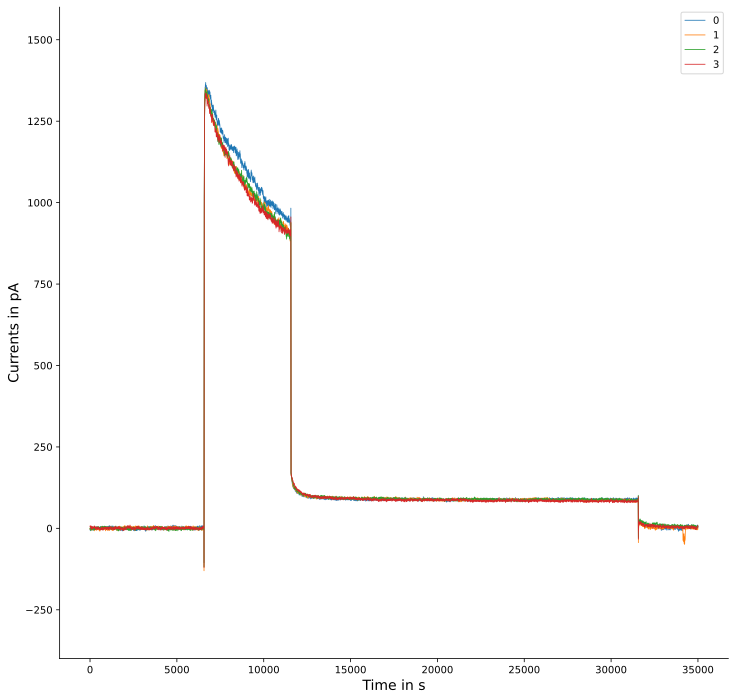

In [6]:
fig = plt.figure(figsize=(12, 12))

for i in range(num_sweep):
  plt.plot(stacked[i, :35000], linewidth=0.8)

plt.ylabel('Currents in pA', fontsize=14)
plt.xlabel('Time in s', fontsize=14)
plt.legend([str(i) for i in range(num_sweep)])
# plt.yticks(fontsize=20)
# plt.xticks([0, 5000, 10000, 15000], [0, 0.5, 1.0, 1.5], fontsize=20)
# plt.xlim((0, 17000))
plt.ylim((-400, 1600))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


In [7]:
# Write a udf to plot average traces

def plot_average(filename, sweeps, duration=10, baseline_correction=True, plot_inset=True, inset_ylim=[300, 500], savefigure=False):
  '''
  file name is the abf file
  sweeps is a list of sweep to average
  baseline_correction: whether to correct baseline
  plot_inset: whether to zoom in the tail current part and plot it as an inset
  '''
  abf = pyabf.ABF(filename)

  num_sweep = len(abf.sweepList)

  duration = duration  # sweep duration = 20 s
  samp_rate = 10 * 1000  # sampling rate = 10 kHz

  sweep_len = int(duration * samp_rate) # Be careful here needs to convert to integer

  stacked = np.zeros([num_sweep, sweep_len])  
  if baseline_correction:
  # Baseline correction, stop using this in outward currents
    for i in abf.sweepList:
        abf.setSweep(i, baseline = [0.1, 0.2])
        stacked[i, :] = abf.sweepY[0:sweep_len]
  else:
    for i in abf.sweepList:
        abf.setSweep(i)
        stacked[i, :] = abf.sweepY[0:sweep_len]    

  fig = plt.figure(figsize=(12, 12))
  
  average = np.mean(stacked, axis=0)
  plt.plot(average[:35000], 'k', lw=0.9)

  plt.ylabel('Currents in pA', fontsize=24)
  plt.xlabel('Time in s', fontsize=24)
  # plt.yticks(fontsize=20)
  # plt.xticks([0, 5000, 10000, 15000], [0, 0.5, 1.0, 1.5], fontsize=20)
  # plt.xlim((0, 20000))
  plt.ylim((-400, 2000))
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  if plot_inset:
    left, bottom, width, height = [0.6, 0.60, 0.2, 0.2]
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.plot(average[10700:13000], 'k', linewidth=0.8)
    ax2.set_ylim(inset_ylim)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

  # plt.legend(['Trace ' + str(i) for i in sweeps], frameon=False)

  if savefigure:
    savename = 'cell' + filename.split('.')[0] + 'average' + '.png'
    plt.savefig(savename, dpi=700, bbox_inches='tight')



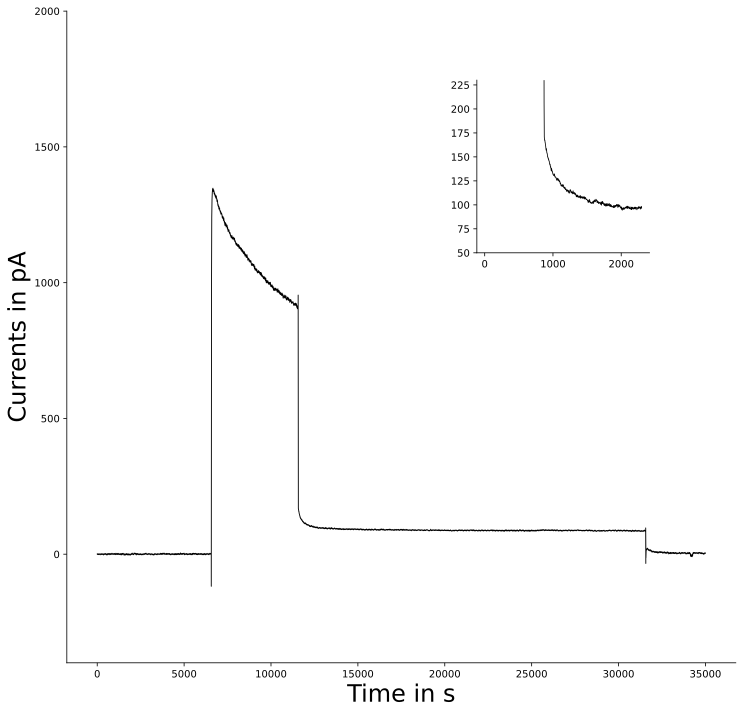

In [9]:
plot_average(myCell, [0, 1], inset_ylim=[50, 230], savefigure=True)

In [ ]:
# Write a function to plot individual trace

def plot_trace(filename, sweeps, duration=10, baseline_correction=True, plot_inset=True, inset_ylim=[300, 500], savefigure=False):
  '''

  plot the trace(s) in sweep of a file
  filename: the abf file
  sweeps: the list of sweeps to plot
  baseline_correction: whether to correct baseline
  plot_inset: whether to zoom in the tail current part and plot it as an inset

  '''

  abf = pyabf.ABF(filename)

  num_sweep = len(abf.sweepList)

  duration = duration  # sweep duration = 20 s
  samp_rate = 10 * 1000  # sampling rate = 10 kHz

  sweep_len = int(duration * samp_rate) # Be careful here needs to convert to integer

  stacked = np.zeros([num_sweep, sweep_len])  
  if baseline_correction:
  # Baseline correction, stop using this in outward currents
    for i in abf.sweepList:
        abf.setSweep(i, baseline = [0.1, 0.2])
        stacked[i, :] = abf.sweepY[0:sweep_len]
  else:
    for i in abf.sweepList:
        abf.setSweep(i)
        stacked[i, :] = abf.sweepY[0:sweep_len]    

  fig = plt.figure(figsize=(12, 12))

  for i in sweeps:
    plt.plot(stacked[i, :35000], linewidth=0.8)

  plt.ylabel('Currents in pA', fontsize=24)
  plt.xlabel('Time in s', fontsize=24)
  # plt.yticks(fontsize=20)
  # plt.xticks([0, 5000, 10000, 15000], [0, 0.5, 1.0, 1.5], fontsize=20)
  # plt.xlim((0, 20000))
  plt.ylim((-400, 2000))
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  

  if plot_inset:
    left, bottom, width, height = [0.6, 0.60, 0.2, 0.2]
    ax2 = fig.add_axes([left, bottom, width, height])
    for i in sweeps:
      ax2.plot(stacked[i, 10700:13000], linewidth=0.8)
    ax2.set_ylim(inset_ylim)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

  plt.legend(['Trace ' + str(i) for i in sweeps], frameon=False)

  if savefigure:
    savename = 'cell' + filename.split('.')[0] + '.png'
    plt.savefig(savename, dpi=900, bbox_inches='tight')



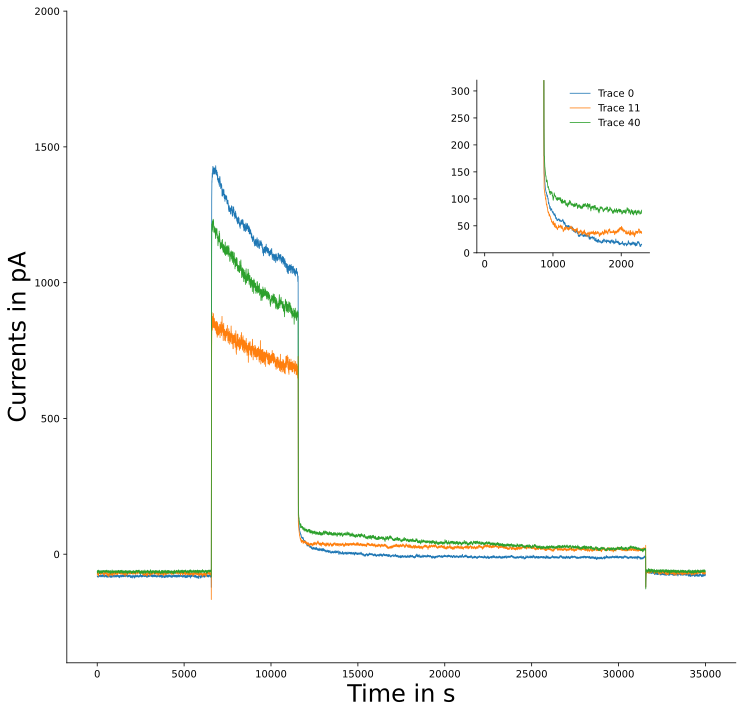

In [ ]:
plot_trace(myCell, sweeps=[0, 11, 40], inset_ylim=[0, 320], baseline_correction=False)